<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

# Global Threshold
### Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold

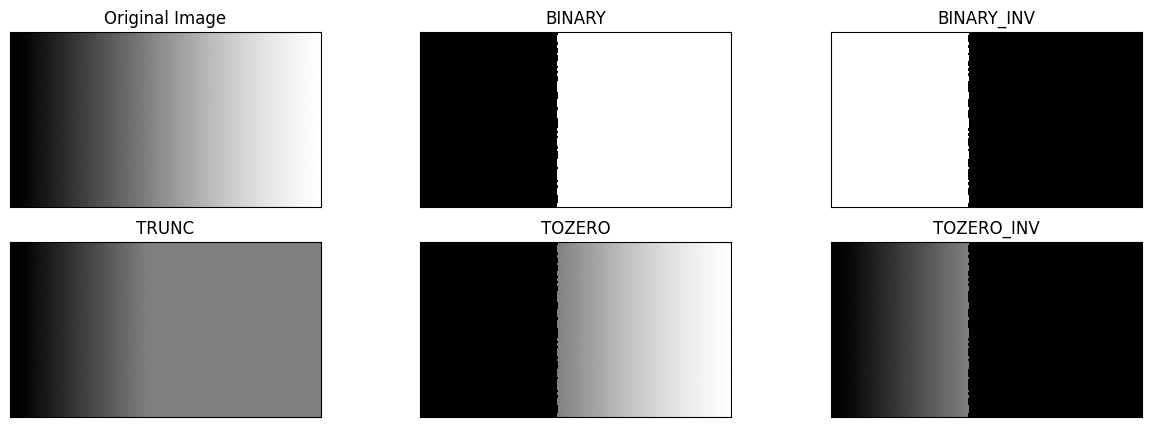

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive Threshold
### Berikut adalah contoh code untuk Adaptive Threshold.

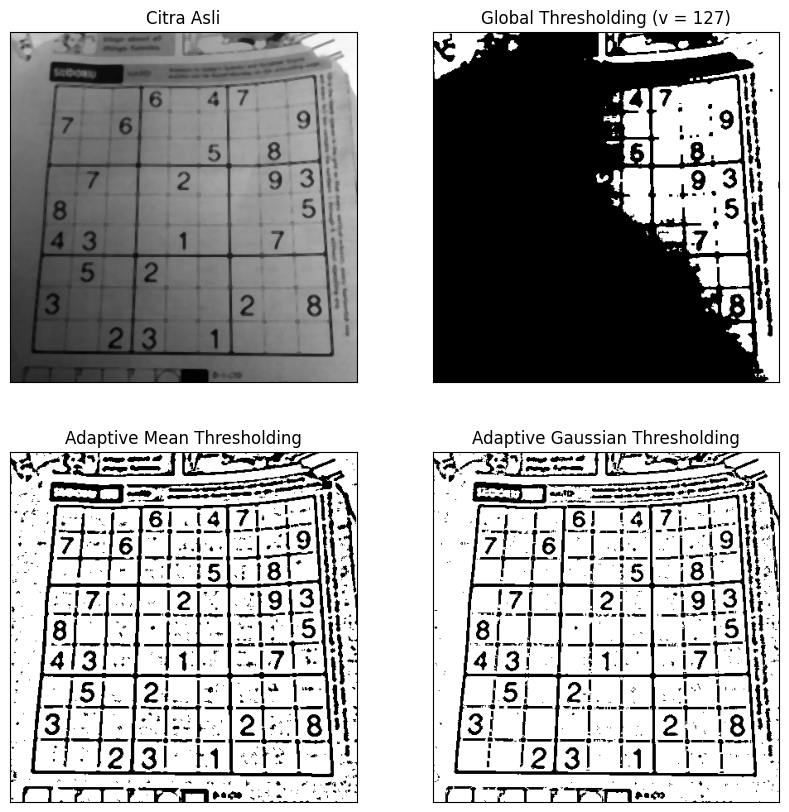

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# Otsu’s Threshold
### Berikut adalah code contoh penggunaan Otsu’s dengan library OpenCV.

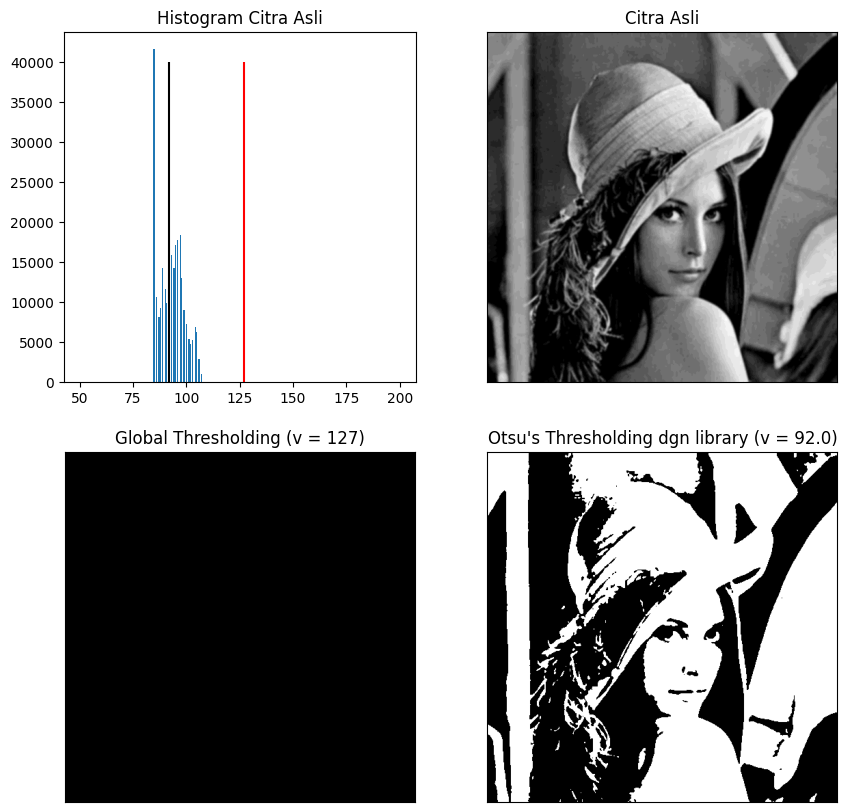

In [ ]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### Code berikut akan menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.

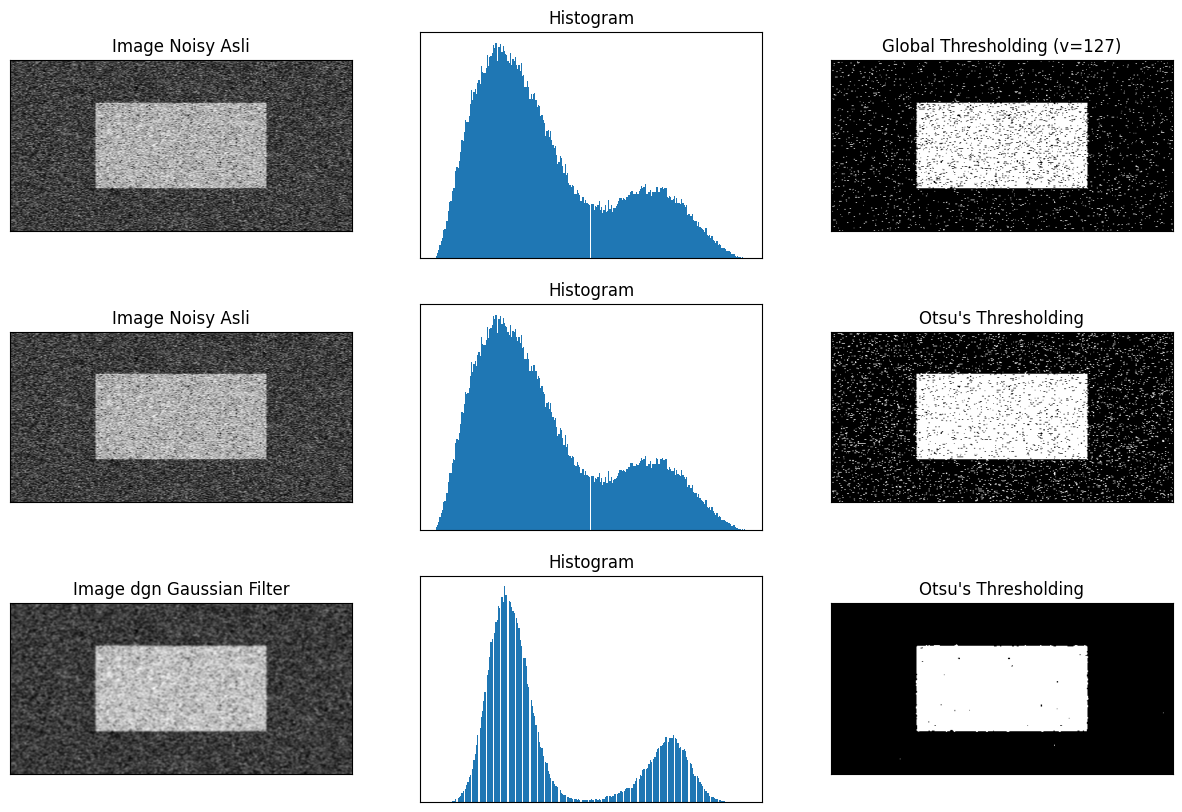

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Sementasi Citra menggunakan K-Means
### Berikut adalah code untuk penggunaan K-Means pada segmentasi citra.

(<Axes: >, <matplotlib.image.AxesImage at 0x7ec4c7237160>)

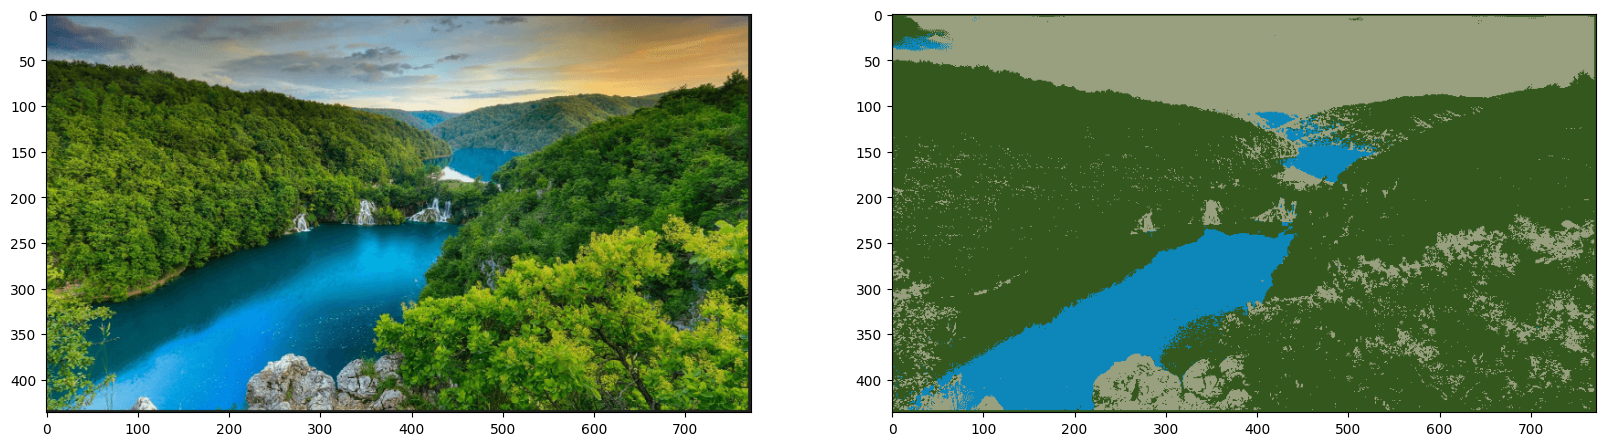

In [ ]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

### Code berikut merupakan lanjutan dari code diatas yang digunakan untuk mengubah warna pada cluster tertentu.

(<Axes: >, <matplotlib.image.AxesImage at 0x7ec4c6f34070>)

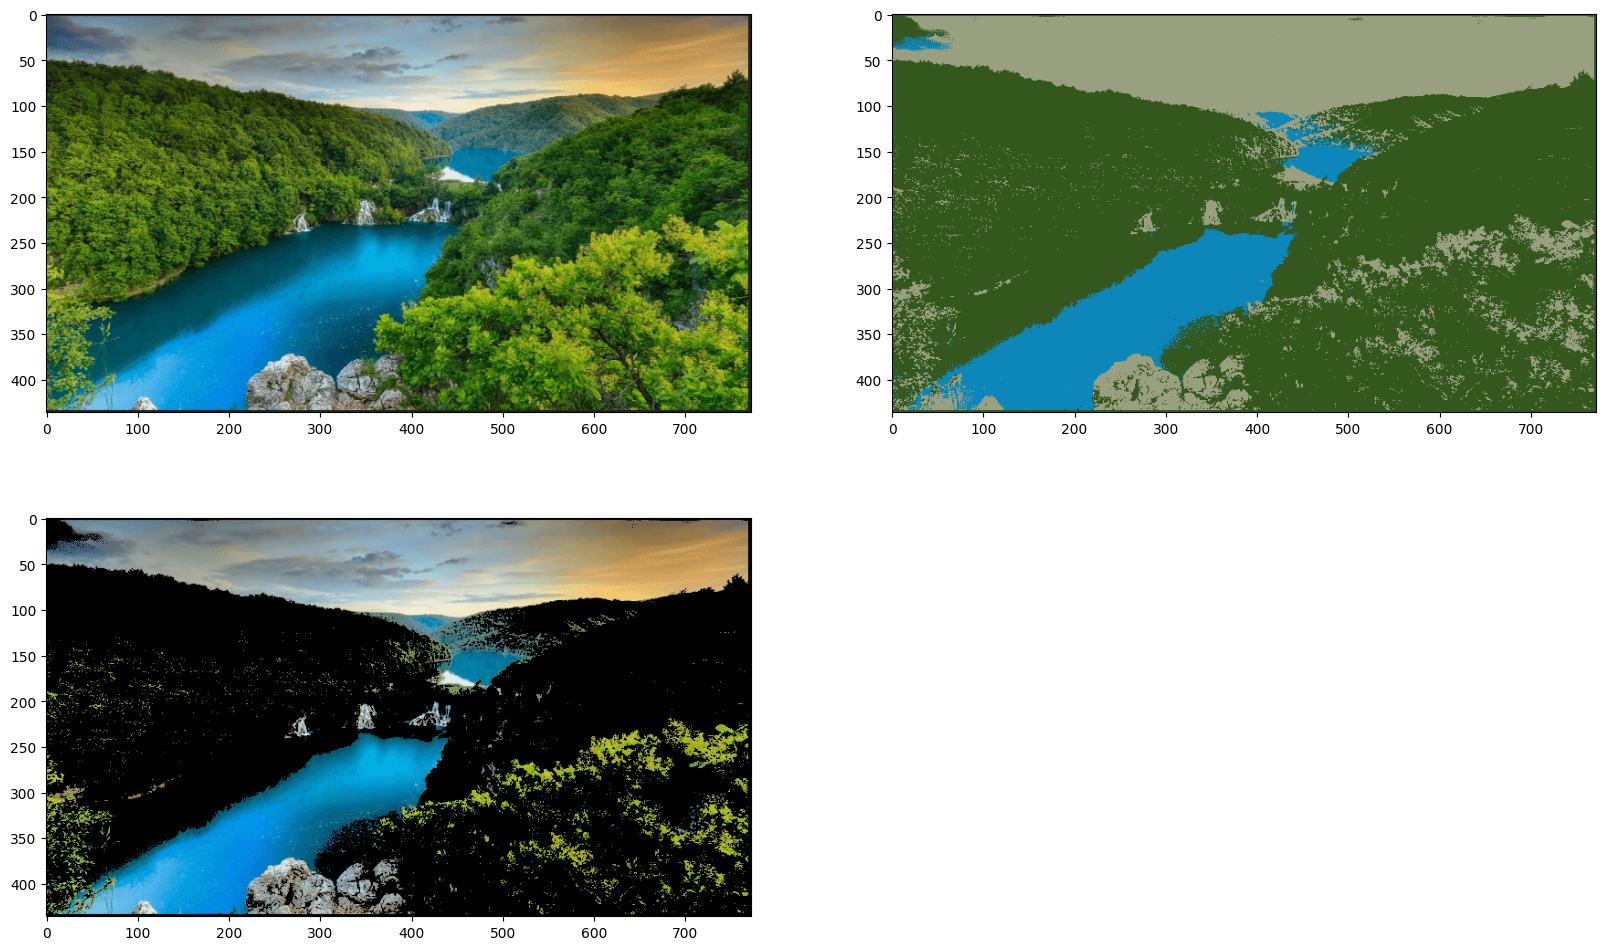

In [ ]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# TUGAS PRAKTIKUM

2. import library

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

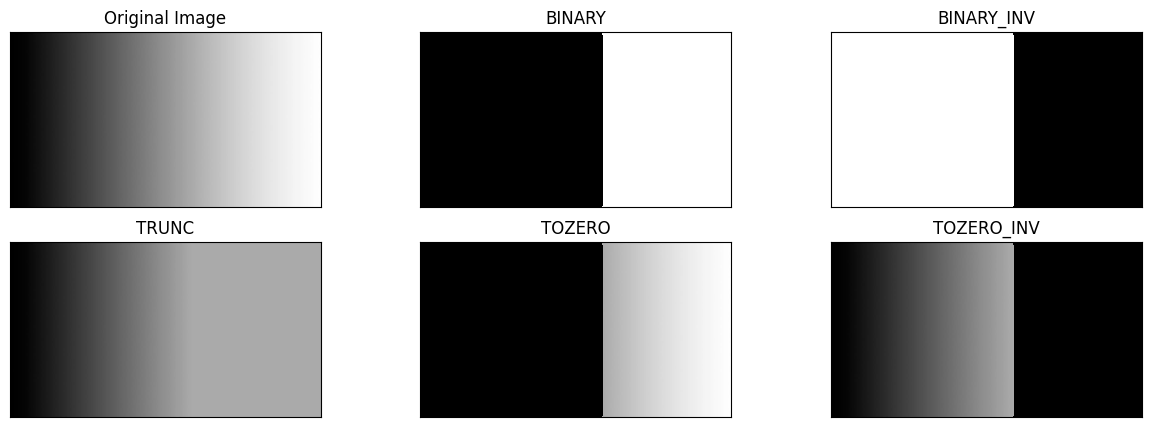

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')

img = cv.imread(filename)

# Nilai Threshold yang ditentukan
thresh = 170

# Membuat fungsi manual thresholding
def manual_threshold(image, thresh, max_value, method):
    # Membuat array kosong untuk hasil threshold
    result = np.zeros_like(image)

    if method == 'binary':
        # Jika piksel lebih dari threshold, tetapkan nilai maksimal, selain itu 0
        result[image > thresh] = max_value
    elif method == 'binary_inv':
        # Jika piksel lebih dari threshold, tetapkan 0, selain itu nilai maksimal
        result[image <= thresh] = max_value
    elif method == 'truncate':
        # Jika piksel lebih dari threshold, tetapkan threshold, selain itu biarkan
        result = np.minimum(image, thresh)
    elif method == 'tozero':
        # Jika piksel lebih dari threshold, biarkan, selain itu tetapkan 0
        result[image > thresh] = image[image > thresh]
    elif method == 'tozero_inv':
        # Jika piksel lebih dari threshold, tetapkan 0, selain itu biarkan
        result[image <= thresh] = image[image <= thresh]

    return result

# Memproses gambar dengan manual thresholding
thresh1 = manual_threshold(img, thresh, 255, 'binary')
thresh2 = manual_threshold(img, thresh, 255, 'binary_inv')
thresh3 = manual_threshold(img, thresh, 255, 'truncate')
thresh4 = manual_threshold(img, thresh, 255, 'tozero')
thresh5 = manual_threshold(img, thresh, 255, 'tozero_inv')

# Menampilkan Hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

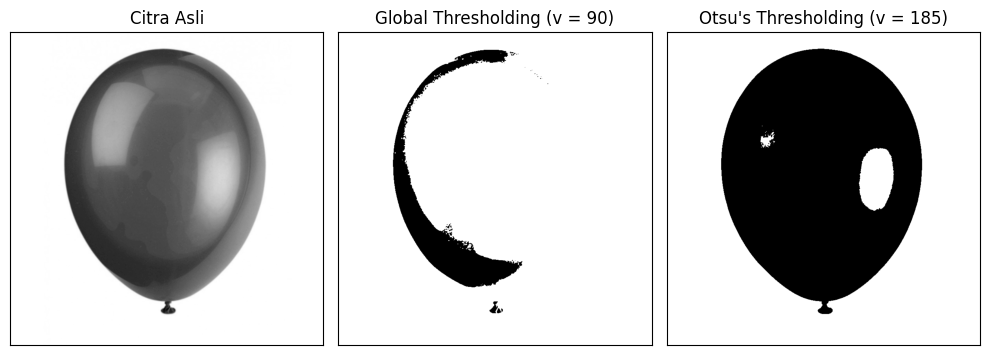

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/balloon.jpg')

img = cv.imread(filename,0)

# Mengaburkan gambar menggunakan GaussianBlur
def manual_gaussian_blur(image, kernel_size=(5,5), sigma=0):
    kernel_x = cv.getGaussianKernel(kernel_size[0], sigma)
    kernel_y = cv.getGaussianKernel(kernel_size[1], sigma)
    kernel = kernel_x * kernel_y.T
    return cv.filter2D(image, -1, kernel)

# Global Thresholding Manual
def manual_threshold(image, thresh):
    result = np.zeros_like(image)
    result[image > thresh] = 255
    return result

# Otsu Thresholding Manual
def otsu_threshold(image):
    # Histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])

    # Total number of pixels
    total = image.shape[0] * image.shape[1]

    current_max, threshold = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    weightB, weightF = 0, 0

    for i in range(0, 256):
        sumT += i * hist[i]

    for i in range(0, 256):
        weightB += hist[i]   # Weight Background
        if weightB == 0:
            continue

        weightF = total - weightB   # Weight Foreground
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB      # Mean Background
        meanF = (sumT - sumB) / weightF  # Mean Foreground

        # Between Class Variance
        varBetween = weightB * weightF * (meanB - meanF) ** 2

        # Check if new maximum found
        if varBetween > current_max:
            current_max = varBetween
            threshold = i

    # Apply threshold
    result = manual_threshold(image, threshold)
    return result, threshold

# Gaussian blur manual
blur = manual_gaussian_blur(img, (5, 5), 0)

# Global thresholding manual
thresh = 90
th1 = manual_threshold(blur, thresh)

# Otsu's thresholding manual
th2, ret2 = otsu_threshold(blur)

# Teks untuk Otsu's thresholding
x = "Otsu's Thresholding (v = " + str(ret2) + ")"

# Menampilkan hasil
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(10, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
  - anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  - Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
  - Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).



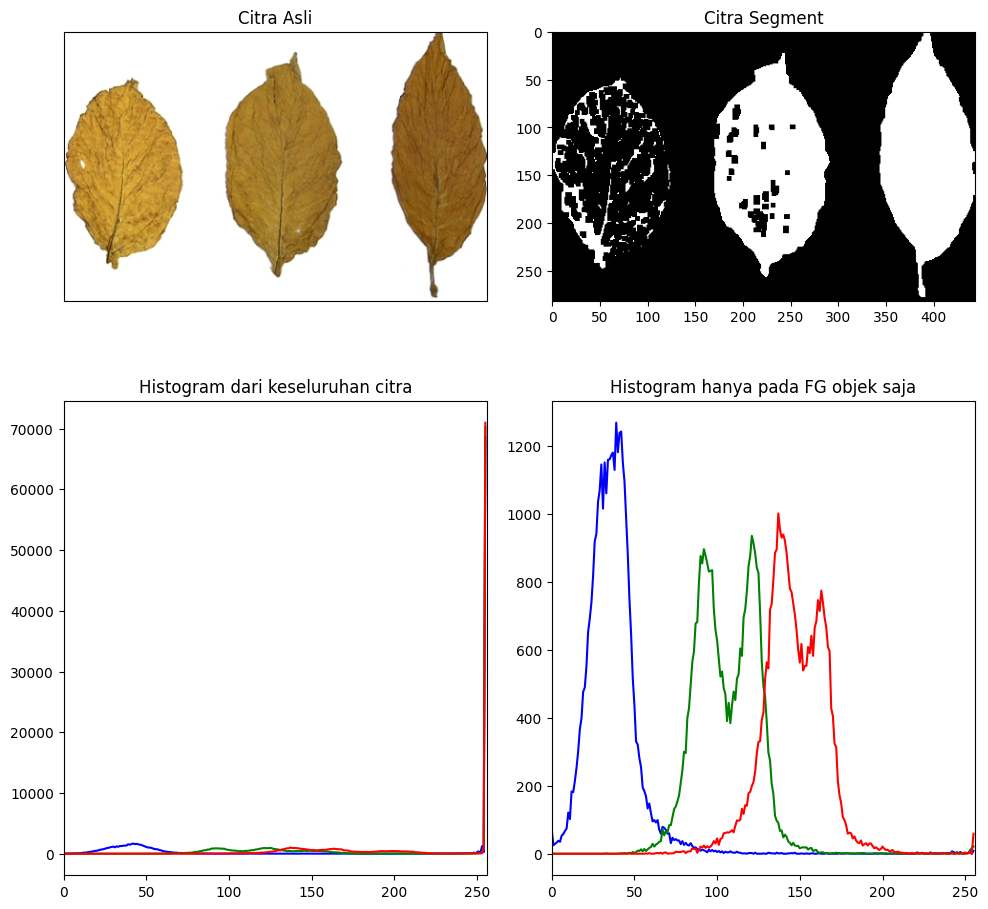

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')

gray = cv.cvtColor(filename.copy(), cv.COLOR_BGR2GRAY)

# Segmentasi menggunakan thresholding (threshold global)
_, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

# Memastikan objek foreground berwarna putih dan background berwarna hitam
thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, np.ones((5,5),np.uint8))

# Masking: memilih hanya piksel foreground dari gambar asli
masked_img = cv.bitwise_and(img, img, mask=thresh)

# Membuat histogram dari citra asli
color = ('b', 'g', 'r')
plt.figure(figsize=(10,10))

# Plot Gambar Asli
plt.subplot(221), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

# Plot Gambar Segmentasi
plt.subplot(222), plt.imshow(thresh, cmap='gray')
plt.title('Citra Segment')

# Histogram dari keseluruhan citra
plt.subplot(223)
for i, col in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.title('Histogram dari keseluruhan citra')

# Histogram dari foreground saja (berdasarkan hasil segmentasi)
plt.subplot(224)
for i, col in enumerate(color):
    hist_fg = cv.calcHist([img], [i], thresh, [256], [0,256])
    plt.plot(hist_fg, color=col)
    plt.xlim([0,256])
plt.title('Histogram hanya pada FG objek saja')

plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

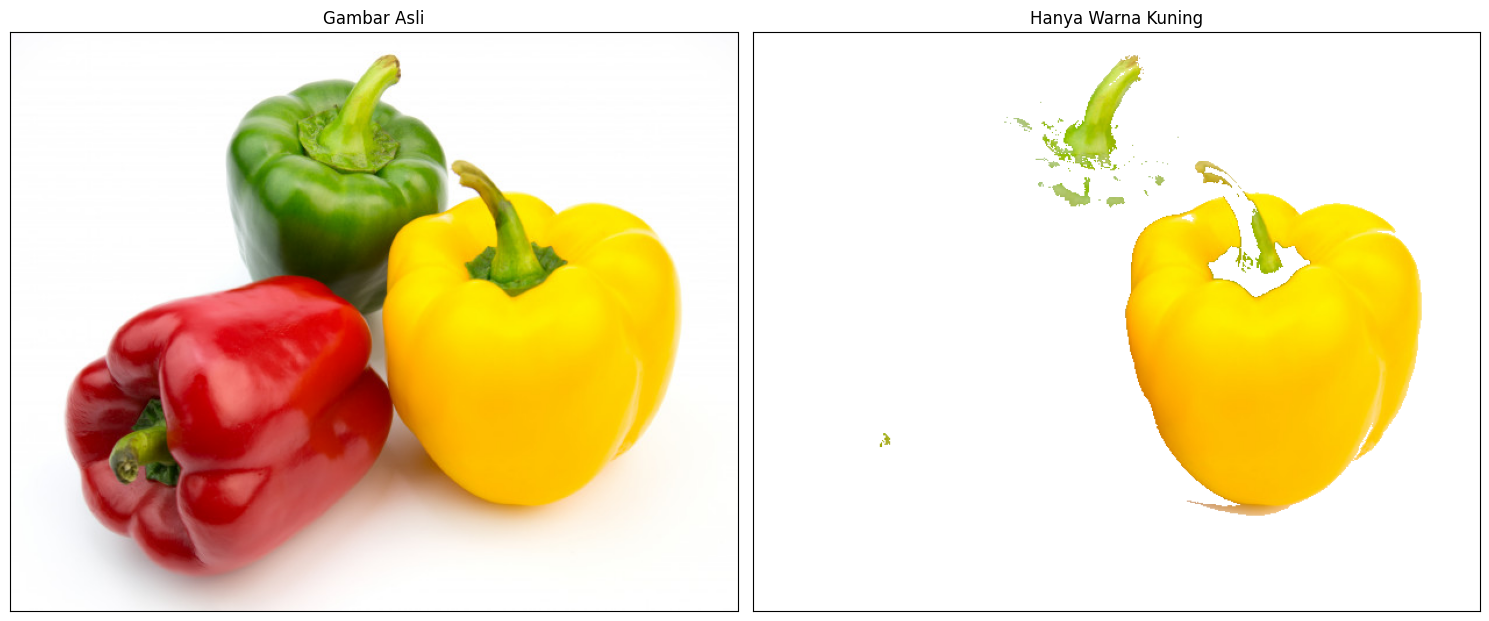

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))  # Mengubah menjadi vektor 2D dengan 3 channel warna
Z = np.float32(Z)  # Mengubah tipe data ke float32 untuk K-Means

# K-Means clustering
K = 3  # Kita akan membuat 3 klaster, kamu bisa sesuaikan dengan kebutuhan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv.kmeans(Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)  # Kembalikan pusat klaster ke format uint8 (warna asli)
segmented_img = centers[labels.flatten()]  # Buat gambar dari label yang terklasifikasi
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(15,10))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.xticks([]), plt.yticks([])

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Hanya Warna Kuning')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.


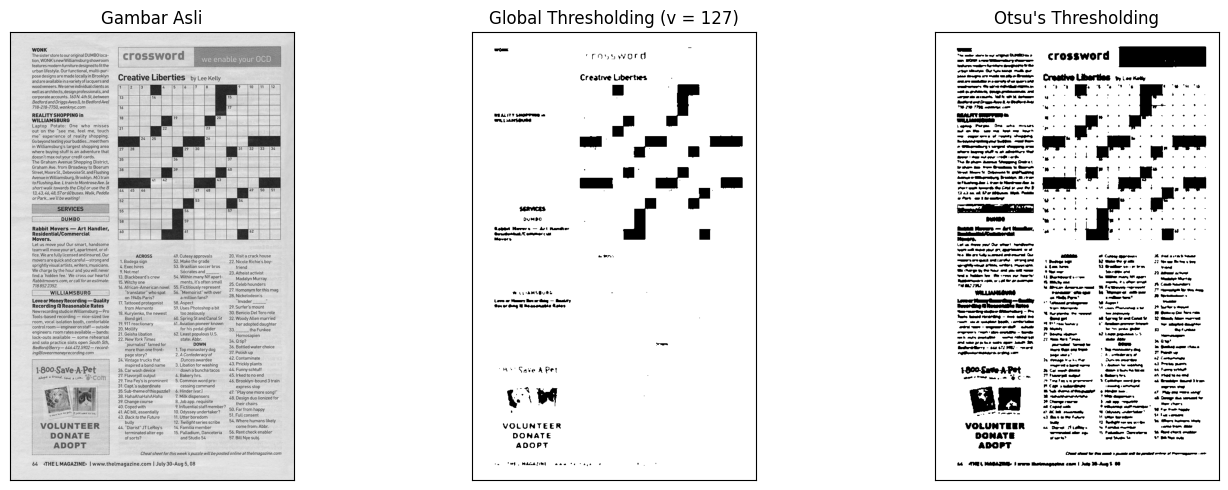

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [3]:
filename = '/content/drive/MyDrive/PCVK/crossword.jpg'
img = cv.imread(filename, 0)

# Gaussian blur untuk mengurangi noise
blur = cv.GaussianBlur(img, (5, 5), 0)

# Global Thresholding
thresh_value = 127  # Threshold global ditentukan secara manual
ret1, th1 = cv.threshold(blur, thresh_value, 255, cv.THRESH_BINARY)

# Otsu's Thresholding (tanpa menentukan threshold manual)
ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan hasil
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")
